# Programming Quantum Teleportation

Sara A. Metwalli

Keio University

# About Me
---

Sara Ayman Metwalli  
I am 27 years old from Egypt  
Bachelor Degree in Communications and Electronics Engineering in 2014 and Masters Degree in Computer and Communications Engineering from Tokyo Institute of Technology in 2018.  

Now, I work with AQUA (Advancing QUantum Architecture) group in Keio University as a researcher.

For more information about me: https://sara-ayman-metwalli.jimdosite.com  
For more information about AQUA: http://aqua.sfc.wide.ad.jp/home.html

## Today we will talk about Teleportation!!!!

# No, not the one you are thinking about!

<img src="Pictures/tele.jpg">

# Introduction
---------------------

Quantum teleportation is one of the practical applications of quantum physics that can be implemented using quantum computers.

Before we get into what is quantum teleportation, or how to implement it in code.

Let's first discuss what is "Quantum" ?


# What is "Quantum Computing"?
----------
Quantum computing is the use of quantum-mechanical phenomena such as superposition and entanglement to perform computation.


What is entanglement? and what does superposition mean?


To explain these important concepts, we first need to understand what is a "Qubit"

<img src="Pictures/thinking_man.jpg">

## Quantum Bits (Qubits)
---
<img src="Pictures/Meduim Images/August Articles/qubit.jpeg">

Qubits to quantum computers are the same as bits for classical computers

Qubits are the simplest version of a mechanical system used as the base of quantum computers. 

How qubits interact together follows the laws of quantum theory. The two most important aspects of that are superposition and entanglement. 

## Quantum Entanglement
---
<img src="Pictures/Meduim Images/August Articles/int.png">

Particles (atoms, ions) that have interacted at some point in time retain a  connection and can be entangled with each other as a *pair*. 

Knowing the spin state of one entangled particle allows one to know that the spin of its entangled particle is in the opposite direction.

## Quantum Superposition
---
<img src="Pictures/Meduim Images/August Articles/cat.png">


Imagine the qubit as an electron in a magnetic field. The electron's spin may be either in alignment with the field, which is known as a spin-up state, or opposite to the field, which is known as a spin-down state. 

According to quantum law, the particle then enters a superposition of states, in which it behaves as if it were in both states simultaneously and it stays in that states until it is measured.


## Coding Break
---

How can we represent qubits in code?

Use the Python *Qiskit* Module.

In [ ]:
!pip install qiskit
!pip install numpy
!pip install matplotlib

In [8]:
#Codes in this notebook are inspired by IBM's Qiskit tutorials and the arXiv:1903.04359v1 paper
#This code is written by: Sara A. Metwalli for the Woman Who Code CONNECT Asia Summit 2019

#Libraries needed to implement and simulate quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute 
import math as m
import warnings
#Custem functions to simplify answers
import Our_Qiskit_Functions as oq #a part of the libabry presented in arXiv:1903.04359v1.
%matplotlib inline
warnings.filterwarnings("ignore", category=UserWarning)

#Initialize backends simulators to visualize circuits
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

#Create quantum registers (to hold qubits)
q = QuantumRegister(2)
#Classical register to hold classical bits (Used to measure results)
c = ClassicalRegister(2)
#Create a quantum circuit using the above registers
qc = QuantumCircuit(q,c)

# Quantum Gates
---

Programing quantum computers is now done on a gate level, similar to classical gates.

Now

Let's talk about most common quantum gates

## Identity Operator
---
<img src="Pictures/Meduim Images/July Articles/the-I-gate.gif">

The identity operator leaves the state unchanged, it is mostly used to initialize qubits to zero.

| input     | output  |
|---------  |-------  |
| 0         | 0       |
| 1         | 1       |


1.0  |00>   
1.0  |00>   


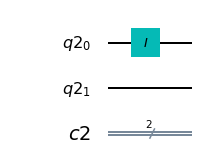

In [9]:
#1- Iden operator
qc.i(q[0])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## NOT Gate
---
<img src="Pictures/Meduim Images/July Articles/the-not-gate.gif">

The NOT gate takes a qubits and flips its state!

| input   | output|
|---------|-------|
| 0       | 1     |
| 1       | 0     |


1.0  |10>   
1.0  |10>   


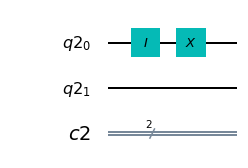

In [10]:
#2- NOT gate
qc.x(q[0])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## Controlled-NOT Gate (Toffoli Gate)
---
<img src="Pictures/Meduim Images/July Articles/the-cnot-gate.gif">

The controlled-NOT functionality is described using this truth-table:

| control in 	| target bit 	| control out 	| output 	|
|------------	|------------	|-------------	|--------	|
| 0          	| 0          	| 0           	| 0      	|
| 0          	| 1          	| 0           	| 1      	|
| 1          	| 0          	| 1           	| 1      	|
| 1          	| 1          	| 1           	| 0      	|

Example:

CNOT  |00> ===> |00>  
CNOT  |01> ===> |01>  
CNOT  |10> ===> |11>  
CNOT  |11> ===> |10>  

1.0  |11>   
1.0  |11>   


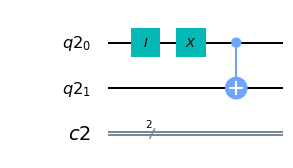

In [11]:
#3- Controlled-NOT
qc.cx(q[0],q[1])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## The Hadamard Gate
---
<img src="Pictures/Meduim Images/July Articles/the-h-gate.gif">

The Hadamard gate (H) is the magic gate. It is the gate responsible for creating the superposition of states. This gate puts the qubit in 50/50 superposition of states |0⟩ and |1⟩ despite whether the input state was |0⟩ or|1⟩.



0.70711  |10>   -0.70711  |11>   
0.70711  |10>   -0.70711  |11>   


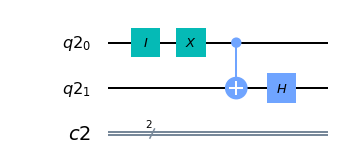

In [12]:
#4- Hadamard
qc.h(q[1])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

## Phase Shift Gate
---

leaves a qubit’s |0> amplitude unchanged, while multiplying by a phase $$e^{i \phi}$$ to a qubit’s |1>.

0.70711  |10>   -0.5-0.5j |11>   
0.70711  |10>   -0.5-0.5j |11>   


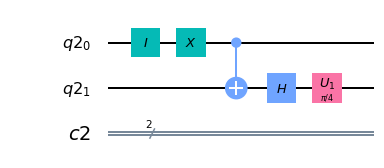

In [13]:
#5- Unitary
qc.u1(m.pi/4, q[1])
print(oq.Wavefunction(qc))
qc.draw(output = "mpl")

Phew...

That was a lot!!

# Quantum Communication
---

Let's assume we have two people, Alice and Bob. Alice wants to send a qubit to Bob. How can she do that?


Alice's qubit is in an unknown quantum state |$\varphi$> = $\alpha$|0> + $\beta$|1>


## Quantum basis
---

|0> base is the zero state  
|1> base is the one state  
|+> base is the Hadamard of the |0> state  
|-> base is the Hadamard of the |1> state  


<img src="Pictures/Meduim Images/July Articles/Quantum Simulators/5.png">

## No Clone Theorem
---

In quantum physics, the no-cloning theorem states that it is impossible to create an identical copy of an arbitrary unknown quantum state.


But, if Alice can not copy her qubit and send it to Bob, what can she do??

## Copying a qubit
----

If a qubit's state is known (already measured) it can be copied into another qubit.

But how can we do that??

 We know that the two superposition states |+⟩ or |−⟩ must have been generated from either the |0⟩ or |1⟩ basis states. So, this means that if we were to take our qubit that was in the |+⟩ or |−⟩ state out of superposition, then our qubit would be in either the |0⟩ or |1⟩ basis state.

-0.92388-0.38268j |01>   


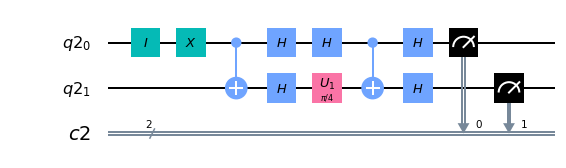

In [14]:
#This code snippets demonstrate the process of copying a known state of a qubit
#prepare the qubit I want to copy
# Create an initial superposition + state
qc.h(q[0])
# Take the qubit out of superposition
qc.h(q[0])
# Perform a CNOT between the qubits
qc.cx(q[0], q[1])
# Put the qubits into superposition and now the states are the same
qc.h(q[0])
qc.h(q[1])
#Execute the circuit
qc.measure(q,c)
M = execute(qc, S_simulator).result().get_counts(qc)
#Display the qubits after the copy
oq.Wavefunction(qc)
#Draws the circuit
qc.draw(output = "mpl") 

In [15]:
%%javascript 
Jupyter.notebook.execute_cells([7])

<IPython.core.display.Javascript object>

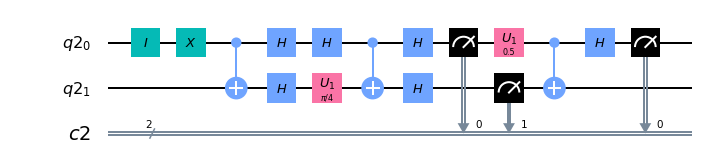

In [16]:
#This code snippet demonstrates communicating a qubit between two parties
# Prepare an initial state for qubit 1 using a single unitary
qc.u1(0.5, q[0])
# Perform a CNOT between qubit 1 and qubit 2
qc.cx(q[0], q[1])
# Measure qubit 1 in the |+>, |-> basis
qc.h(q[0])
qc.measure(q[0], c[0])
# If needed Perform a phase correction to qubit 2
if c[0] == 1:
    qc.z(q[1])
qc.draw(output = "mpl")

## Viola!! Alice's initial qubit is now teleported to Bob!

<img src="Pictures/but-wait.png">

*Although* we _DID_ telport a qubit from Alice to Bob, Alice and Bob did not communicate *faster* than the speed of light!!

Alice needed to share her measurement with Bob through some classical channel which is _not_ faster than light!

Alice ended up destroying her qubit in the process of sending it to Bob.


# Quantum Teleportation
---


0.70711  |000>   0.70711  |011>   
-------------------------------------------------------------------------------
{'110': 264, '001': 260, '111': 263, '000': 237}
1.0  |000>   


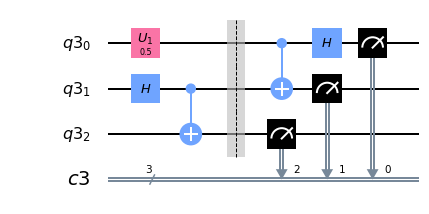

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
import numpy as np
import math as m
import Our_Qiskit_Functions as oq

#Initialize backends
S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0]

# Create a Quantum Register and classical registers with 3 qubits and 3 classical bits.
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Prepare an initial state using a single unitary
qc.u1(0.5, q[0])

 # Prepare an entangled pair using qubit ② and qubit ③
qc.h(q[1])
qc.cx(q[1], q[2])
oq.Wavefunction(qc)
# Barrier to prevent gate reordering for optimization
qc.barrier(q)

# Perform a CNOT between qubit ① and qubit ②
qc.cx(q[0], q[1])

# Measure qubit ② in the computational basis
qc.measure(q[1], c[1])

# Measure qubit ① in the + - basis
qc.h(q[0])
qc.measure(q[0], c[0])

# If needed Perform a phase correction to qubit ③
if c[0] == 1:
    qc.z(q[2])

# If needed Perform a bit flip correction to qubit ③
if c[1] == 1:
    qc.x(q[2])


qc.measure(q[2], c[2])


# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, M_simulator)
sim_result = job_sim.result()
#print(sim_result)
print("-------------------------------------------------------------------------------")
print(sim_result.get_counts(qc))
print("===============================================================================")
oq.Wavefunction(qc)
qc.draw(output = "mpl")